In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Cognate kinetics
k1r=718
k2f=1475
k2r_cog=2.1
k3_cog=1529
k4=209
k5_cog=200
k6_cog = 32

t1r = 1000/k1r
t2f = 1000/k2f
t2r_cog = 1000/k2r_cog
t3_cog = 1000/k3_cog
t4 = 1000/k4
t5_cog = 1000/k5_cog
t6_cog = 1000/k6_cog

#Near-cognate kinetics
k1r=718
k2f=1475
k2r_nr = 1120
k3_nr = 6
k4=209

t2r_nr = 1000/k2r_nr
t3_nr = 1000/k3_nr

#Non-cognate kinetics
k1r=718

In [46]:
np.random.seed(1)
t1r_exp=np.random.exponential(t1r,size=4000)
t2f_exp=np.random.exponential(t2f,size=4000)
t2r_cog_exp=np.random.exponential(t2r_cog,size=4000)
t3_cog_exp=np.random.exponential(t3_cog,size=4000)
t4_exp=np.random.exponential(t4,size=4000)
t5_cog_exp=np.random.exponential(t5_cog,size=4000)
t6_cog_exp = np.random.exponential(t6_cog,size=4000)

t2r_nr_exp=np.random.exponential(t2r_nr,size=4000)
t3_nr_exp=np.random.exponential(t3_nr,size=4000)

print(np.average(t1r_exp))
print(np.average(t2f_exp))
print(np.average(t2r_cog_exp))
print(np.average(t3_cog_exp))
print(np.average(t4_exp))
print(np.average(t5_cog_exp))
print(np.average(t6_cog_exp))

print(np.average(t2r_nr_exp))
print(np.average(t3_nr_exp))

1.3871834571507315
0.6654345668683457
476.37105150778655
0.6569705162271943
4.817620598402602
5.010373257065323
31.40871649725717
0.8755426069227361
165.29523708765146


6765
6751
42.1486765045038
0.4501028001601294
0.6751


Text(0.5, 1.0, 'Cognate (Succesful)')

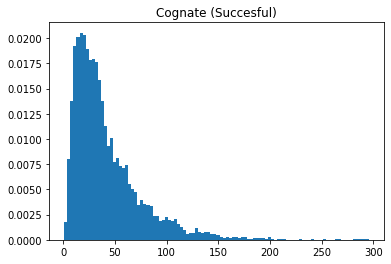

In [73]:
#Cognate calculation (distribution pulling from exponential)

dwelltime_cog_success = list()
dwelltime_cog_fail = list()
count = 0
count1 = 0

for i in range(10000):
    dwell_t = 0
    state=1
    while state != 0 and state != 3:
        dwell_t1r = np.random.choice(t1r_exp)
        dwell_t2f = np.random.choice(t2f_exp)
        if state==1:
            if dwell_t1r<dwell_t2f:
                dwell_t+=dwell_t1r
                dwelltime_cog_fail.append(dwell_t)
                state=0
                continue;
            else:
                dwell_t+=dwell_t2f
                state = 2
                
        if state==2:
            count+=1
            dwell_t2r_cog = np.random.choice(t2r_cog_exp)
            dwell_t3_cog = np.random.choice(t3_cog_exp)
            if dwell_t2r_cog<dwell_t3_cog:
                #dwell_t+= t2r_cog
                state = 1
            else:
                count1+=1
                dwell_t += dwell_t3_cog
                state = 3
        
        if state==3:
            dwell_t+=np.random.choice(t4_exp)+np.random.choice(t5_cog_exp)+np.random.choice(t6_cog_exp)
            
    if state!=0: dwelltime_cog_success.append(dwell_t)

print(count)
print(count1)
plt.hist(dwelltime_cog_success,bins=100,density=True)
print(np.mean(dwelltime_cog_success))
print(np.mean(dwelltime_cog_fail))
print(len(dwelltime_cog_success)/(len(dwelltime_cog_success)+len(dwelltime_cog_fail)))
plt.title('Cognate (Succesful)')

Text(0.5, 1.0, 'Cognate (Unsuccessful)')

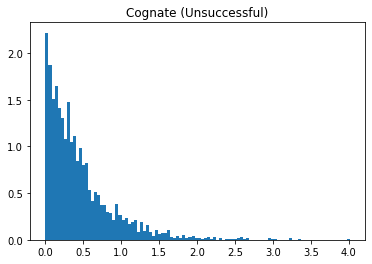

In [74]:
plt.hist(dwelltime_cog_fail,bins=100,density=True);
plt.title('Cognate (Unsuccessful)')


3.186132436345184
3.611795427981895


/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(0.5, 1.0, 'Near-cognate (unsuccesful)')

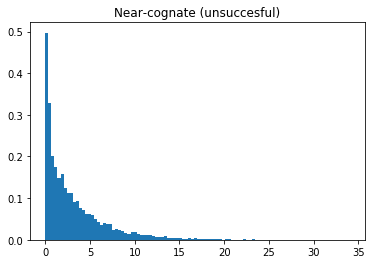

In [31]:
#Near-cognate calculation
dwelltime_nr_success = list()
dwelltime_nr_fail = list()

for i in range(10000):
    dwell_t = 0
    state=1
    while state != 0 and state != 3:
        dwell_t1r = np.random.choice(t1r_exp)
        dwell_t2f = np.random.choice(t2f_exp)
        if state==1:
            if dwell_t1r<dwell_t2f: 
                dwell_t+=dwell_t1r
                dwelltime_nr_fail.append(dwell_t)
                state=0
            else:
                dwell_t+=dwell_t2f
                state = 2
                
        if state==2:
            dwell_t2r_nr = np.random.choice(t2r_nr_exp)
            dwell_t3_nr = np.random.choice(t3_nr_exp)
            if dwell_t2r_nr < dwell_t3_nr:
                dwell_t+= dwell_t2r_nr
                state = 1
            else:
                dwell_t += dwell_t3_nr
                state = 3
                dwelltime_nr_success.append(dwell_t)
                

plt.hist(dwelltime_nr_fail,bins=100,normed=True)
print(np.mean(dwelltime_nr_fail))
print(np.std(dwelltime_nr_fail))
plt.title('Near-cognate (Unsuccessful)')

1.3935767204757359


/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Non-cognate (Unsuccessful)')

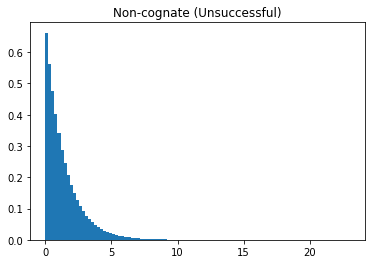

In [34]:
#Non-cognate calculation (distribution pulling from exponential)

dwelltime_non=(np.random.exponential(t1r,size=1000000))
plt.hist(dwelltime_non,bins=100,normed=True)
print(np.average(dwelltime_non))
plt.title('Non-cognate (Unsuccessful)')

Average cognate dwell time (successful): 42.1  ms
Average cognate dwell time (unsucessful): 0.5  ms
Proportion of succesful cognate incorporation vs. attempts:  0.68
Average near cognate dwell time (unsuccesful) 3.2  ms
Average non-cognate dwell time (unsuccesful) 1.4 ms


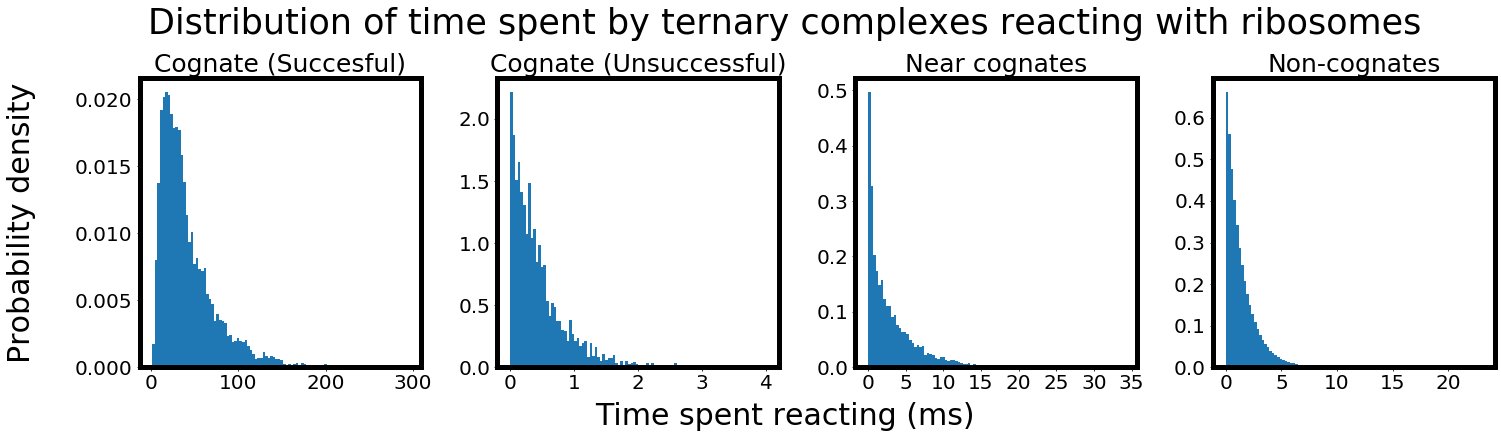

In [132]:
import matplotlib.ticker as plticker

fig = plt.figure(figsize=(20,5))
fig.suptitle("Distribution of time spent by ternary complexes reacting with ribosomes",fontsize=35,y=1.1)

ax = plt.subplot(1,4,1)
plt.hist(dwelltime_cog_success,bins=100,density=True)
plt.title("Cognate (Succesful)",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.setp(ax.spines.values(), linewidth=5)
loc = plticker.MultipleLocator(base=100)
ax.xaxis.set_major_locator(loc)
loc = plticker.MultipleLocator(base=0.005)
ax.yaxis.set_major_locator(loc)


ax=plt.subplot(1,4,2)
plt.hist(dwelltime_cog_fail,bins=100,density=True)
plt.title("Cognate (Unsuccessful)",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.setp(ax.spines.values(), linewidth=5)
loc = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(loc)


ax=plt.subplot(1,4,3)
plt.hist(dwelltime_nr_fail,bins=100,density=True)
plt.title("Near cognates",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.setp(ax.spines.values(), linewidth=5)

ax=plt.subplot(1,4,4)
plt.hist(dwelltime_non,bins=100,density=True)
plt.title("Non-cognates",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.setp(ax.spines.values(), linewidth=5)


fig.text(0.5, -0.06, 'Time spent reacting (ms)', ha='center',fontsize=30)
fig.text(-0.04, 0.5, 'Probability density', va='center', rotation='vertical',fontsize=30)


print("Average cognate dwell time (successful):", round(np.average(dwelltime_cog_success),1), " ms")
print("Average cognate dwell time (unsucessful):", round(np.average(dwelltime_cog_fail),1), " ms")
print("Proportion of succesful cognate incorporation vs. attempts: ",round(len(dwelltime_cog_success)/(len(dwelltime_cog_success)+len(dwelltime_cog_fail)),2))
print("Average near cognate dwell time (unsuccesful)", round(np.average(dwelltime_nr_fail),1)," ms")
print("Average non-cognate dwell time (unsuccesful)", round(np.average(t1rdist),1), "ms")
plt.tight_layout(pad=1.0)